In [38]:
import pandas as pd

data = pd.read_csv("data/housing.csv")

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

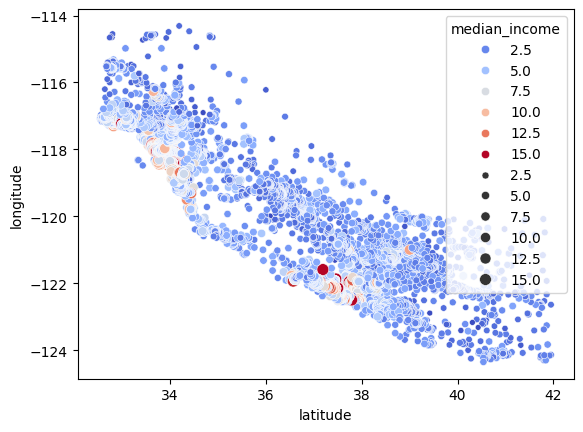

In [39]:
import seaborn as sb
import numpy as np

sb.scatterplot(
    x="latitude", 
    y="longitude", 
    data=data, 
    hue="median_income", 
    palette="coolwarm",
    size=np.array(data["median_income"])
    )

In [40]:
data.loc[:, ["latitude", "longitude", "median_income"]].head()

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [41]:
from sklearn.cluster import KMeans

X = data.loc[:, ["latitude", "longitude", "median_income"]]

model = KMeans(n_clusters=6)

predictions = model.fit_predict(X)

In [42]:
predictions.shape

(20640,)

In [43]:
X["economic_segment"] = predictions

X.head()

,latitude,longitude,median_income,economic_segment
0,37.88,-122.23,8.3252,3
1,37.86,-122.22,8.3014,3
2,37.85,-122.24,7.2574,3
3,37.85,-122.25,5.6431,3
4,37.85,-122.25,3.8462,2


In [44]:
X["economic_segment"].value_counts()

economic_segment
1    6564
2    4883
5    4201
3    2764
0    1677
4     551
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

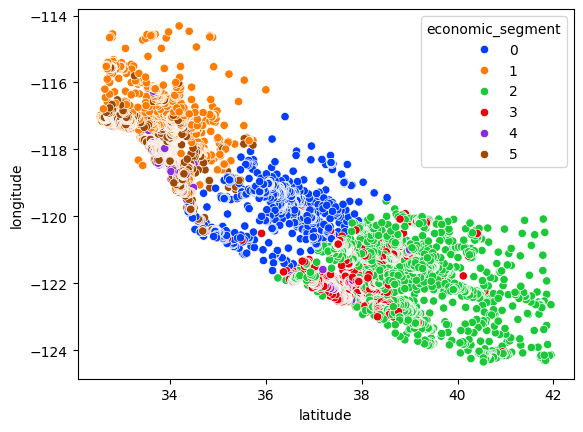

In [46]:
import seaborn as sb
import numpy as np

sb.scatterplot(
    x="latitude", 
    y="longitude", 
    data=X, 
    hue="economic_segment", 
    palette="bright",
    
    )

/var/folders/46/v2k78vwj5fv3_7ldt_trfn_m0000gn/T/ipykernel_99535/3602445437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="economic_segment", data=X, palette="bright")


<Axes: xlabel='economic_segment', ylabel='count'>

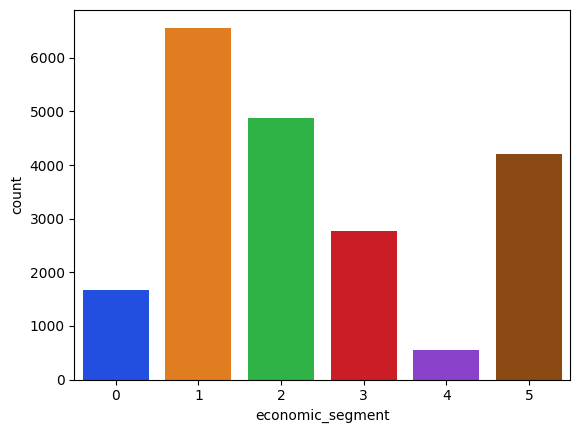

In [52]:
sb.countplot(x="economic_segment", data=X, palette="bright")


In [53]:
X.groupby(["economic_segment"])["median_income"].mean()


economic_segment
0     2.660862
1     2.788679
2     2.824459
3     5.524420
4    10.488034
5     5.304274
Name: median_income, dtype: float64